# Hyperparameter Tuning
 - Hyperparameter를 수정해가며 모델을 최적화 하는 과정
 - 그리드 서치, 랜덤 서치 등
 - 일일이 값을 변경해주며 테스트 하기엔 비효율적 
 => sklearn의 gridsearchCV를 사용해보자

## GridSearchCV 연습 with Iris 데이터

In [22]:
# GridSearchCV cross validation 기능 연습
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.2)

dt_params = [{'max_depth': np.arange(1, 20)}]   # 'criterion' : ['grid', 'entropy']
dt = DecisionTreeClassifier()
# refit : 최적의 하이퍼 파라미터들로 다시 학습
# cv : cross validation 횟수, None => default로 5회 실행됨
grid = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, refit=True)
grid.fit(x_train, y_train)

# grid.cv_results_     : K-fold cross validation test 결과로 dictionary 리턴
# grid.best_params_    : best parameter => {'max_depth': 5}
# grid.best_estimator_ : best parameter로 생성한 DT모델
# grid.best_score_     : best_estimator의 평균 CV 스코어

# 최적 모델로 시험 데이터의 성능을 평가한다.
best_model = grid.best_estimator_

print("CV 최고 정확도 =", grid.best_score_)
print("최적 파라미터 =", grid.best_params_)
print("\n테스트 데이터 정확도 = {:.4f}".format(best_model.score(x_test, y_test)))

CV 최고 정확도 = 0.9416666666666667
최적 파라미터 = {'max_depth': 2}

테스트 데이터 정확도 = 0.9667


## GridSearchCV 이용해 Boston house price 예측 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as  plt

# Boston house dataset을 읽어온다.
boston = load_boston()

# 데이터 프레임 형태로 저장한다.
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = boston.target

In [24]:
# 데이터 스케일 조정
df['ZN'] /= 10
df['AGE'] /= 10
df['TAX'] /= 100
df['PTRATIO'] /= 10
df['B'] /= 100
df['PRICE'] /= 10

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,1.8,2.31,0.0,0.538,6.575,6.52,4.0900,1.0,2.96,1.53,3.9690,4.98,2.40
1,0.02731,0.0,7.07,0.0,0.469,6.421,7.89,4.9671,2.0,2.42,1.78,3.9690,9.14,2.16
2,0.02729,0.0,7.07,0.0,0.469,7.185,6.11,4.9671,2.0,2.42,1.78,3.9283,4.03,3.47
3,0.03237,0.0,2.18,0.0,0.458,6.998,4.58,6.0622,3.0,2.22,1.87,3.9463,2.94,3.34
4,0.06905,0.0,2.18,0.0,0.458,7.147,5.42,6.0622,3.0,2.22,1.87,3.9690,5.33,3.62


In [25]:
# 학습 데이터와 시험 데이터로 분리한다.
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.15)
x_train.shape, x_test.shape

# 1.Decision Tree Regressor 모델 사용
d_max = 10
dt_params = [{'max_depth': np.arange(1, d_max)}]
dt = DecisionTreeRegressor()
dt_grid = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, refit=True)
dt_grid.fit(x_train, y_train)

# 2. SVR 모델 사용
sv_params = [{'kernel': ['rbf'], 'C':[1000, 10000, 20000], 'epsilon':[0.1, 1.0, 2.0]}]
sv = SVR()
sv_grid = GridSearchCV(estimator=sv, param_grid=sv_params, cv=5, refit=True)
sv_grid.fit(x_train, y_train)

print('Decision Tree: Best paramter =', dt_grid.best_params_)
dt_best = dt_grid.best_estimator_
print('Decision Tree: evaluation data의 score = {:.3f}'.format(dt_best.score(x_test, y_test)))

print('\nSVR: Best paramter =', sv_grid.best_params_)
sv_best = sv_grid.best_estimator_
print('SVR: evaluation data의 score = {:.3f}'.format(dt_best.score(x_test, y_test)))

Decision Tree: Best paramter = {'max_depth': 8}
Decision Tree: evaluation data의 score = 0.808

SVR: Best paramter = {'C': 1000, 'epsilon': 2.0, 'kernel': 'rbf'}
SVR: evaluation data의 score = 0.808


In [27]:
# test data의 추정 결과를 육안으로 확인한다. SVR만 확인.
y_svr_pred = sv_best.predict(x_test)
y_dt_pred = dt_best.predict(x_test)

# 원래 스케일로 환원한다.
d_test = y_test * 10
d_dt_pred = y_dt_pred * 10
d_svr_pred = y_svr_pred * 10

df_pred = pd.DataFrame(np.c_[d_test, d_dt_pred, d_svr_pred], columns=['d_test', 'd_dt_pred', 'd_svr_pred'])
df_pred.head()

,d_test,d_dt_pred,d_svr_pred
0,333.0,296.333333,376.186849
1,109.0,136.000000,102.581208
2,279.0,284.500000,305.628160
3,127.0,167.740741,152.920812
4,296.0,362.000000,240.334368


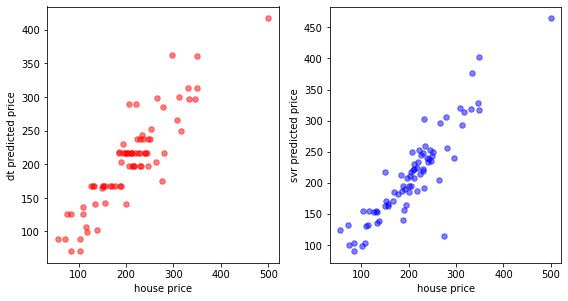

In [35]:
# 추정 결과를 시각화 한다.
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.scatter(d_test, d_dt_pred, c='red', s=30, alpha=0.5)
plt.xlabel("house price")
plt.ylabel("dt predicted price")

plt.subplot(2, 2, 2)
plt.scatter(d_test, d_svr_pred, c='blue', s=30, alpha=0.5)
plt.xlabel("house price")
plt.ylabel("svr predicted price")
plt.tight_layout()
plt.show()

## Pipeline 사용해 여러 모델 한번에 튜닝


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Boston house dataset을 읽어온다.
boston = load_boston()

# 데이터 프레임 형태로 저장한다.
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = boston.target

# 데이터 스케일 조정
df[['ZN', 'AGE', 'PTRATIO', 'PRICE']] /= 10
df[['TAX', 'B']] /= 100

df.head()

In [38]:
# 학습 데이터와 시험 데이터로 분리한다.
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.15)
x_train.shape, x_test.shape

pipe = Pipeline(steps=[('model', SVR())])  # 임의 model로 pipe를 초기화한다.
grid_params = [{'model':[SVR()],
                'model__kernel':['rbf'],
                'model__C':[0.1, 1.0, 10.0],
                'model__epsilon':[0.1, 1.0, 2.0]},
               
               {'model':[DecisionTreeRegressor()],
                'model__max_depth':np.arange(1, 20)}]

grid = GridSearchCV(estimator=pipe, param_grid=grid_params, cv=10, refit=True)
grid.fit(x_train, y_train)

best_model = grid.best_estimator_

print("Best parameter = ", grid.best_params_)
print("Best test score = ", best_model.score(x_test, y_test))

Best parameter =  {'model': DecisionTreeRegressor(max_depth=17), 'model__max_depth': 17}
Best test score =  0.834606430304839


In [39]:
# test data의 추정 결과를 육안으로 확인한다.
y_pred = best_model.predict(x_test)

# 원래 스케일로 환원한다.
d_test = y_test * 10
d_pred = y_pred * 10

# 데이터 프레임으로 변환한다
df_pred = pd.DataFrame(np.c_[d_test, d_pred], columns=['price', 'prediction'])
df_pred.head()

,price,prediction
0,133.0,81.0
1,84.0,72.0
2,185.0,150.0
3,201.0,193.0
4,145.0,136.0


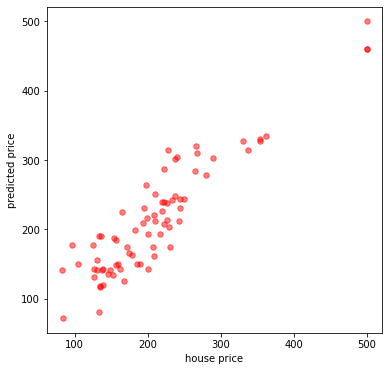

In [40]:
# 추정 결과를 시각화 한다.
plt.figure(figsize=(6, 6))
plt.scatter(d_test, d_pred, c='red', s=30, alpha=0.5)
plt.xlabel("house price")
plt.ylabel("predicted price")
plt.show()